# PartIIB: Linear and Logistic Regression

In this part, I will use Random Forest and ANOVA F-test to select features to include into regression models. These methods can be used when the target variable is binary. During features selection process, I will drop variables which have high correlations with variables with higher contributions to avoid multicollinearity. The threshold for correlations is 0.8. Before running regressions, I will split the data into training and test sets for each model. After that, I will compare whether which approach gives better result. I will use R-square and mse as measurements.

Note: the Neural Networks part is in the other file as I have problem when I import tensorflow using this notebook.

In [38]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
#Download file
data = pd.read_csv("MLF_GP1_CreditScore.csv")

In [3]:
data.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [4]:
#Get information of the dataset and check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

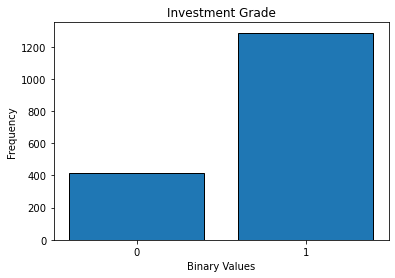

In [43]:
#Plot histogram for Investment Grade
plt.hist(data['InvGrd'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Binary Values')
plt.ylabel('Frequency')
plt.title('Investment Grade')
plt.show()

The binary values are not equally distributed. We can see that there are about 1300 firms that are investment grade, while there are about 400 firms that are not investment grade.

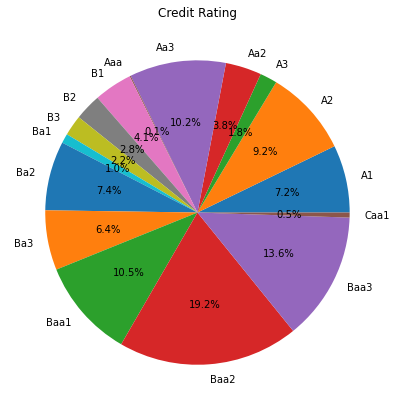

In [49]:
#Create pie chart for Credit Rating
#Create frequency for each unique value from 'Rating' column
value_counts = {}
for i in data['Rating']:
    if i in value_counts:
        value_counts[i] += 1
    else:
        value_counts[i] = 1

#Get unique values and their frequency
labels = list(value_counts.keys())
sizes = list(value_counts.values())

#Set figure size
plt.figure(figsize=(7, 7))

# Plot pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit Rating')
plt.show()

There are more firms that have credit rating Baa2 (19.2%), while there are very small amount of firms that have credit rating Caa1 (0.5%). We can see that the numbers of firms having each credit rating are not balance.

In [4]:
#Separate features and target variables for linear regression and logistic regression
X = data.iloc[:, : -2] #exclude target variables from the feature variables
y_inv = data.iloc[:, -2] #Select second-last column as target variable

# Feature Selection

In this part, I will use Random Forest and ANOVA F-test for features selection. The higher the scores, either from Random Forest or ANOVA F-test, mean the more contributions of those features on the target variable.

# Random Forest

In [5]:
#import required library
from sklearn.ensemble import RandomForestClassifier

In [6]:
#Create and fit random forest
random_forest_inv = RandomForestClassifier(n_estimators=100, random_state=511)
random_forest_inv.fit(X, y_inv)

RandomForestClassifier(random_state=511)

In [7]:
#Get features according to feature importances that build up a decision tree
features_inv = pd.Series(random_forest_inv.feature_importances_, index=X.columns).sort_values(ascending=False)

In [9]:
features_inv

Free Cash Flow              0.058884
CFO                         0.055622
Total MV                    0.051034
ROA                         0.050791
Net Income Before Extras    0.047199
EBITDA                      0.045876
PE                          0.045743
CFO/Debt                    0.045613
Current Liquidity           0.043383
Sales/Revenues              0.042414
Cash                        0.041073
Gross Margin                0.040711
ROE                         0.039559
EBITDA Margin               0.037232
EPS Before Extras           0.037196
Total Debt/MV               0.034443
Net Debt/MV                 0.032922
Total Debt                  0.032188
Net Debt                    0.029114
LT Debt                     0.029066
Total Liquidity             0.027954
Interest Coverage           0.027499
Total Debt/EBITDA           0.027075
Current Liabilities         0.026512
ST Debt                     0.025619
Net Debt/EBITDA             0.025280
dtype: float64

# Anova F-test

In [9]:
#import required library
from sklearn.feature_selection import f_classif, SelectKBest

In [10]:
#Calculate F-score for features selection for Investment Grade
select = SelectKBest(score_func=f_classif, k=10)
features_selected = select.fit_transform(X, y_inv)
f_scores_inv = pd.Series(select.scores_, index=X.columns).sort_values(ascending=False)

In [11]:
f_scores_inv

Total MV                    15.615525
Current Liquidity           15.026387
Total Debt                  13.981950
Total Debt/EBITDA           13.711943
Cash                        13.519462
Total Debt/MV               12.916831
EBITDA                      12.637489
Sales/Revenues              11.168591
Gross Margin                 7.452172
LT Debt                      6.481413
CFO/Debt                     4.739131
CFO                          4.148539
Net Debt                     3.028504
Net Debt/MV                  2.632223
Net Debt/EBITDA              1.570117
Net Income Before Extras     1.324571
EPS Before Extras            1.298699
Free Cash Flow               1.184904
Interest Coverage            1.085629
EBITDA Margin                0.987733
ROA                          0.906653
PE                           0.802622
ROE                          0.683285
Current Liabilities          0.615749
Total Liquidity              0.441166
ST Debt                      0.015572
dtype: float

# Heatmap for Correlations between Features

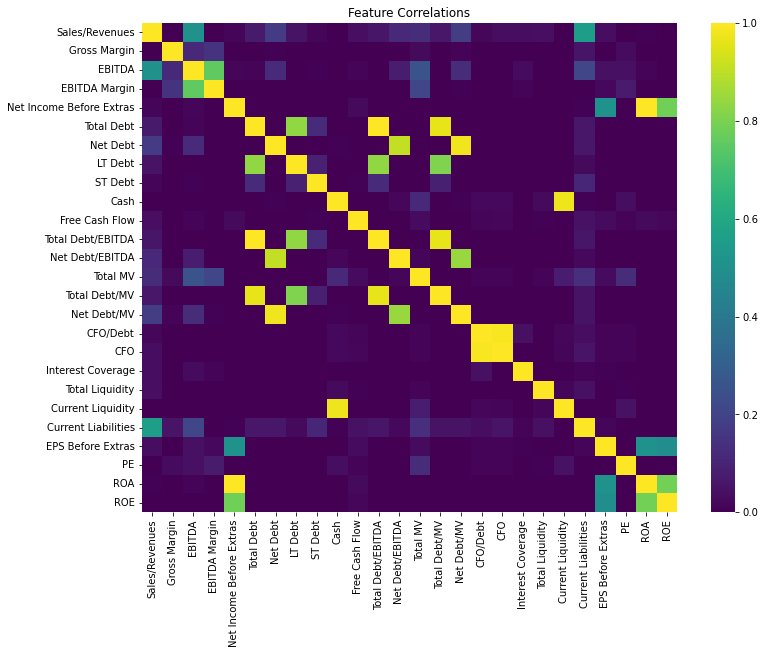

In [13]:
#Create heatmap to see correlations between continuous variables
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate correlation for continuous variables
corr = X.corr()

#Set figure size
plt.figure(figsize=(12, 9))

#Create heatmap
heatmap = sns.heatmap(corr, cmap='viridis', vmin=0, vmax=1)

#Plot title and axis labels
heatmap.set_title('Feature Correlations')

# Show plot
plt.show()

I created heatmap to see correlations between each continuous feature. If the correlation is higher than 0.8, I will drop variable that has lower Random Forest or F-score. This is to avoid multicolinearity within the model. I will include 6 variables that have highest scores excluding ones with high correlation into the model.

For model based on Random Forest, I will include CFO, Free Cash Flow, ROA, PE, EBITDA, and Total MV into the model. For model based on ANOVA F-test, I will choose to include Total MV, Current Liquidity, Total Debt, EBITDA, Gross Margin, and Sales/Revenues into the model for regressions. I still include both EBITDA and Sales/Revenues despite a moderate correlation (about 0.6). This is because EBITDA indicates profitability of a firm, while Sales/Revenues focuses on the amount of sales in a firm.

# Section I: Linear Regression

# Split Dataset

In [12]:
#Filter dataset for only selected features based on Random Forest
filtered_rf = X[['CFO', 'Free Cash Flow', 'ROA', 'PE', 'Total MV', 'EBITDA']]

#Filter dataset for only selected features based on ANOVA F-test
filtered_anova = X[['Total MV', 'Current Liquidity', 'Total Debt', 'EBITDA', 'Sales/Revenues', 'Gross Margin']]

In [13]:
#Split train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(filtered_rf, y_inv, test_size=0.2, random_state=511)
X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(filtered_anova, y_inv, test_size=0.2, random_state=511)

In [14]:
#Standardize data
scaler = StandardScaler()
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.fit_transform(X_test_rf)
X_train_anova = scaler.fit_transform(X_train_anova)
X_test_anova = scaler.fit_transform(X_test_anova)

I standardized data using 'StandardScaler()' because each feature may have different scales. This is to ensure that Ridge and Lasso regularization will treat each feature equally.

In [17]:
#Check number of observations in train and test set
print(len(X_train_rf), len(X_test_rf))
print(len(y_train_rf), len(y_test_rf))
print(len(X_train_anova), len(X_test_anova))
print(len(y_train_anova), len(y_test_anova))

1360 340
1360 340
1360 340
1360 340


# Ridge Regularization

Linear Regression using Ridge Rularization based on Random Forest

In [45]:
#Linear regression using Ridge for training set based on Random Forest
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_rf, y_train_rf)

#Predict test set
y_ridge_pred_rf = ridge.predict(X_test_rf)

In [46]:
#Get R-square and mse
r2_ridge_rf = r2_score(y_test_rf, y_ridge_pred_rf)
mse_ridge_rf = mean_squared_error(y_test_rf, y_ridge_pred_rf)

Linear Regression using Ridge Rularization based on ANOVA F-test

In [15]:
#Linear regression using Ridge for training set based on Random Forest
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_anova, y_train_anova)

#Predict test set
y_ridge_pred_anova = ridge.predict(X_test_anova)

In [16]:
#Get R-square and mse
r2_ridge_anova = r2_score(y_test_anova, y_ridge_pred_anova)
mse_ridge_anova = mean_squared_error(y_test_anova, y_ridge_pred_anova)

The results are shown below

In [49]:
print('The R-square using Ridge Regularization based on Random Forest is ', r2_ridge_rf)
print('The mean square error using ridge Regularization based on Random Forest is ', mse_ridge_rf)
print('The R-square using Ridge Regularization based on ANOVA F-test is ', r2_ridge_anova)
print('The mean square error using Ridge Regularization based on ANOVA F-test is ', mse_ridge_anova)

The R-square using Ridge Regularization based on Random Forest is  -0.016428511113759647
The mean square error using ridge Regularization based on Random Forest is  0.17475360431129733
The R-square using Ridge Regularization based on ANOVA F-test is  -0.021890960036442753
The mean square error using Ridge Regularization based on ANOVA F-test is  0.17569275805124826


The model based on Random Forest for feature selection is slightly better than the model based on ANOVA F-test. However, the R-square is negative and the mse is large. It means that the model poorly explain the target variable and the expected and actual values are largely different.

# Lasso Regularization

Linear Regression using Lasso Rularization based on Random Forest

In [23]:
#Linear regression using Lasso for training set based on Random Forest
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_rf, y_train_rf)

#Predict test set
y_lasso_pred_rf = lasso.predict(X_test_rf) 

In [24]:
#Get R-square and mse
r2_lasso_rf = r2_score(y_test_rf, y_lasso_pred_rf)
mse_lasso_rf = mean_squared_error(y_test_rf, y_lasso_pred_rf)

Linear Regression using Lasso Rularization based on ANOVA F-test

In [25]:
#Linear regression using Ridge for training set based on Random Forest
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_anova, y_train_anova)

#Predict test set
y_lasso_pred_anova = lasso.predict(X_test_anova)

In [26]:
#Get R-square and mse
r2_lasso_anova = r2_score(y_test_anova, y_lasso_pred_anova)
mse_lasso_anova = mean_squared_error(y_test_anova, y_lasso_pred_anova)

The results are shown below.

In [27]:
print('The R-square using Lasso Regularization based on Random Forest is ', r2_lasso_rf)
print('The mean square error using Lasso Regularization based on Random Forest is ', mse_lasso_rf)
print('The R-square using Lasso Regularization based on ANOVA F-test is ', r2_lasso_anova)
print('The mean square error using Lasso Regularization based on ANOVA F-test is ', mse_lasso_anova)

The R-square using Lasso Regularization based on Random Forest is  -0.0045408805031446065
The mean square error using Lasso Regularization based on Random Forest is  0.17270977508650517
The R-square using Lasso Regularization based on ANOVA F-test is  -0.0045408805031446065
The mean square error using Lasso Regularization based on ANOVA F-test is  0.17270977508650517


The results from Random Forest and ANOVA F-test feature selection are the same. The Lasso Regularization shows better result compared to Ridge Regularization when using linear regression. This may be because Lasso Regularization helps simplifying the model. However, in my opinion, linear regression is more suitable when target variable has continuous values.

# Section II: Logistic Regression

# Ridge Regularization

Logistic Regression using Ridge Rularization based on Random Forest

In [21]:
ridge_log = LogisticRegression(penalty='l2', solver='liblinear') #I add solver for small to medium dataset. It works for both Ridge and Lasso
ridge_log.fit(X_train_rf, y_train_rf)

LogisticRegression(solver='liblinear')

In [22]:
#Predict and get accuracy score
y_pred = ridge_log.predict(X_test_rf)
accuracy = accuracy_score(y_test_rf, y_pred)

In [23]:
y_pred = ridge_log.predict(X_test_rf)
accuracy = accuracy_score(y_test_rf, y_pred)

In [24]:
accuracy

0.7764705882352941

In [25]:
#Show classification report
print(classification_report(y_test_rf, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.01      0.03        75
           1       0.78      0.99      0.87       265

    accuracy                           0.78       340
   macro avg       0.56      0.50      0.45       340
weighted avg       0.68      0.78      0.69       340



Logistic Regression using Ridge Rularization based on ANOVA F-test

In [26]:
#Fit Logistic Regression
ridge_log = LogisticRegression(penalty='l2', solver='liblinear')
ridge_log.fit(X_train_anova, y_train_anova)

LogisticRegression(solver='liblinear')

In [27]:
#Predict and get accuracy score
y_pred = ridge_log.predict(X_test_anova)
accuracy = accuracy_score(y_test_anova, y_pred)

In [28]:
accuracy

0.7823529411764706

In [29]:
#Show classification report
print(classification_report(y_test_anova, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.07      0.12        75
           1       0.79      0.98      0.88       265

    accuracy                           0.78       340
   macro avg       0.67      0.53      0.50       340
weighted avg       0.74      0.78      0.71       340



The model based on ANOVA F-test has accuracy score of 78.24%, which is slightly higher than model based on Random Forest with accuracy score 77.65%. In addition, the precision for predicting whether firm is investment grade is higher for model based on ANOVA F-test.

# Lasso Regularization

Logistic Regression using Lasso Rularization based on Random Forest

In [30]:
#Fit Logistic Regression
lasso_log = LogisticRegression(penalty='l1', solver='liblinear')
lasso_log.fit(X_train_rf, y_train_rf)

LogisticRegression(penalty='l1', solver='liblinear')

In [31]:
#Predict and get accuracy score
y_pred = lasso_log.predict(X_test_rf)
accuracy = accuracy_score(y_test_rf, y_pred)

In [32]:
accuracy

0.7764705882352941

In [33]:
#Show classification report
print(classification_report(y_test_rf, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.01      0.03        75
           1       0.78      0.99      0.87       265

    accuracy                           0.78       340
   macro avg       0.56      0.50      0.45       340
weighted avg       0.68      0.78      0.69       340



Logistic Regression using Lasso Rularization based on ANOVA F-test

In [34]:
#Fit Logistic Regression
lasso_log = LogisticRegression(penalty='l1', solver='liblinear')
lasso_log.fit(X_train_anova, y_train_anova)

LogisticRegression(penalty='l1', solver='liblinear')

In [35]:
#Predict and get accuracy score
y_pred = lasso_log.predict(X_test_anova)
accuracy = accuracy_score(y_test_anova, y_pred)

In [36]:
accuracy

0.7823529411764706

In [37]:
#Show classification report
print(classification_report(y_test_anova, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.07      0.12        75
           1       0.79      0.98      0.88       265

    accuracy                           0.78       340
   macro avg       0.67      0.53      0.50       340
weighted avg       0.74      0.78      0.71       340



The model based on Random Forest using Ridge and Lasso Regularizations give the same result. This also happens to the model based on ANOVA F-test. I tried to increase C to reduce regularization strength and iterations, but the result remains the same. 

# Conclusion

For the linear regression results, the Lasso Regularization performs slightly better than Ridge Regularization. The R-square is closer to zero and the mse is smaller for model Lasso Regularization. The difference between the model selected features based on Random Forest and ANOVA F-test is negligible. In general, linear regression method performs poorly to predict whether a firm is investment grade. The negative R-square shows that the selected features barely explain the model, and the high mse shows that the difference between predicted and actual values are large. Hence, the linear regression model is not suitable for predicting whether a firm is investment grade.

For the logistic regression results, the model using features selected by ANOVA F-test slightly has higher accuracy rate (78.24%) compared to the model using features selected by Random Forest (77.65%). One of the assumptions is that the ANOVA F-test model has higher precision when predicting firm is not investment grade (56%), while the Random Forest model has precision rate of 33%. It is more difficult to predict when firm is not investment grade probably due to smaller sample. The logistic regression with Ridge and Lasso Regularizations have the same result. This may indicate that the regularization barely has impact on the model.

For Neural Networks approach, the accuracy rate when predicting whether a firm is investment grade is 82.35%, while it is 39.12% when predicting credit rating. When predicting investment grade, the NN performs better than other approaches for several reasons. First, the NN can learn more complex and non-linear patterns wich normally appears in financial data. Second, it allows interactions and combinations between features. Third, it has 'Dropout' feature to prevent overfitting and can focus more on important features. The process of features selection is not required. However, the NN approach requires more computational resources and more time for training compared to other approaches. It is also difficult to interpret and show the relationships between features and target variable. If we want to see those relationships, the logistic regression approach can be more useful.

When predicting credit rating, the NN approach does not show impressive result. It can be due to some reasons. First, credit rating has 16 categories, which is more complicated than predicting binary target variable. Second, the dataset is small-meduim size which is difficult for a model to learn. Third, there is a large difference in number of firms in each credit rating. For example, the number of firms that has Caa1 credit rating accounted only 0.5% of the total number of firms. It can be difficult for a model to learn and predict patterns for those ratings.

To conclude, the NN approach performs the best when predicting whether a firm is investment grade by considering accuracy rate. The NN approach does not perform very well when predicting firm credit rating.

# References

https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning
https://towardsdatascience.com/which-models-require-normalized-data-d85ca3c85388#:~:text=Lasso%2C%20Ridge%20and%20Elastic%20Net,same%20for%20all%20the%20variables.&text=Logistic%20regression%20requires%20normalization%20as,problem%20during%20the%20training%20phase.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
